<a href="https://colab.research.google.com/github/ArunK-ML/DL-CNN-Model---Dogs-Cats-Classification---TensorFlow/blob/main/DL_dogs_cats_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [7]:
from google.colab import files
files.upload()   # Upload kaggle.json file here


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"arunkumar9920","key":"1b461b92dbf110bdf1fb980994206762"}'}

In [8]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle datasets download -d salader/dogsvscats


Dataset URL: https://www.kaggle.com/datasets/salader/dogsvscats
License(s): unknown
 93% 0.99G/1.06G [00:10<00:01, 51.4MB/s]
100% 1.06G/1.06G [00:10<00:00, 109MB/s] 


In [10]:
!unzip -qq dogsvscats.zip

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# Generators is divided into batches

# https://keras.io/api/data_loading/image/

In [12]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/train",
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256)
)
val_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/test",
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [13]:
# Normalize

def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
val_ds = val_ds.map(process)

In [15]:
# Create CNN Model

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [19]:
history = model.fit(train_ds,epochs=10,validation_data=val_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 77ms/step - accuracy: 0.5894 - loss: 0.7009 - val_accuracy: 0.7524 - val_loss: 0.5172
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.7595 - loss: 0.4958 - val_accuracy: 0.7946 - val_loss: 0.4341
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 76s 74ms/step - accuracy: 0.8251 - loss: 0.3831 - val_accuracy: 0.7896 - val_loss: 0.4677
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 88s 84ms/step - accuracy: 0.8869 - loss: 0.2575 - val_accuracy: 0.7696 - val_loss: 0.6805
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 81ms/step - accuracy: 0.9443 - loss: 0.1403 - val_accuracy: 0.7566 - val_loss: 1.0914
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.9726 - loss: 0.0794 - val_accuracy: 0.7766 - val_loss: 1.1232
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 79ms/step - accuracy: 0.9800 - loss: 0.0582 - val_accuracy: 0.7722 - val_loss: 1.1611
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 82ms/step - accuracy: 0.9879 - loss: 0.0407 - 

# **Plot**

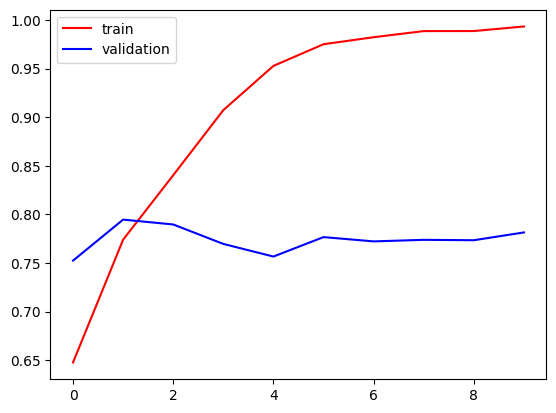

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

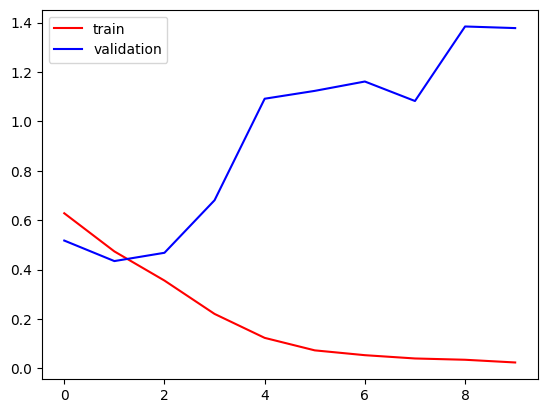

In [21]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# **After Adding Normazied and dropout**

In [22]:
# Create CNN Model

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [24]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [25]:
history = model.fit(train_ds,epochs=10,validation_data=val_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 89ms/step - accuracy: 0.5605 - loss: 2.1280 - val_accuracy: 0.6666 - val_loss: 0.6215
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 92ms/step - accuracy: 0.6937 - loss: 0.5812 - val_accuracy: 0.6226 - val_loss: 0.6641
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 86ms/step - accuracy: 0.7677 - loss: 0.4854 - val_accuracy: 0.7596 - val_loss: 0.5375
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 92ms/step - accuracy: 0.8076 - loss: 0.4188 - val_accuracy: 0.7000 - val_loss: 0.6454
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 92ms/step - accuracy: 0.8449 - loss: 0.3548 - val_accuracy: 0.8220 - val_loss: 0.4002
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 87ms/step - accuracy: 0.8788 - loss: 0.2889 - val_accuracy: 0.8152 - val_loss: 0.6291
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 84ms/step - accuracy: 0.9188 - loss: 0.1986 - val_accuracy: 0.8160 - val_loss: 0.4883
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.9468 - loss: 0.1402 - 

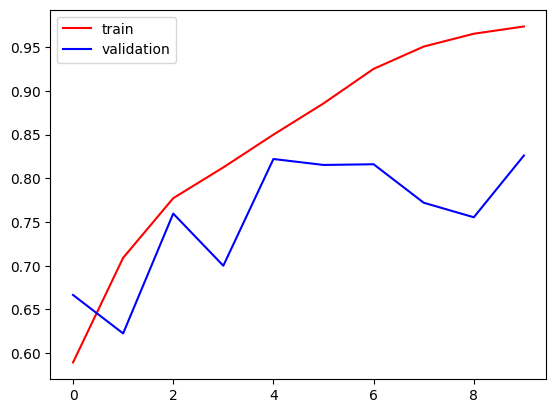

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

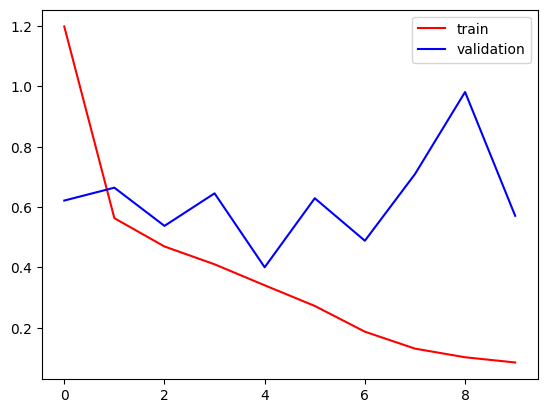

In [27]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# **Test the model**

In [28]:
import cv2

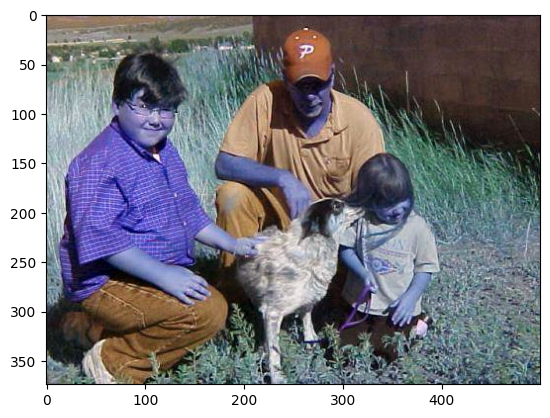

In [29]:
test_img = cv2.imread("/content/train/dogs/dog.10063.jpg")
plt.imshow(test_img)

In [30]:
test_img.shape

(374, 500, 3)

In [31]:
test_img = cv2.resize(test_img,(256,256))

test_input = test_img.reshape((1,256,256,3))

model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[1.]], dtype=float32)

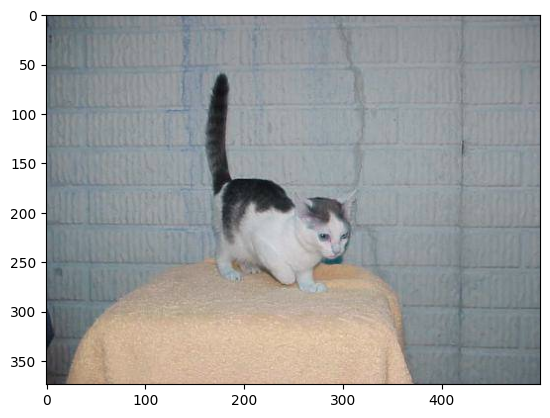

In [32]:
test_img = cv2.imread("/content/train/cats/cat.10108.jpg")
plt.imshow(test_img)

In [33]:
test_img.shape

(374, 500, 3)

In [34]:
test_img = cv2.resize(test_img,(256,256))

test_input = test_img.reshape((1,256,256,3))

model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


array([[0.]], dtype=float32)